# 1. Importing necessary Python libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading the Dataset 

In [110]:
df = pd.read_csv(r"C:\Users\vatsa\Desktop\Projects\QuantumLink\Task_Data.csv")

# 3. Initial Exploration

In [112]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8675 non-null   object 
 1   HomePlanet    8476 non-null   object 
 2   CryoSleep     8460 non-null   object 
 3   Cabin         8476 non-null   object 
 4   Destination   8493 non-null   object 
 5   Age           8496 non-null   float64
 6   VIP           8472 non-null   object 
 7   RoomService   8494 non-null   float64
 8   FoodCourt     8492 non-null   float64
 9   ShoppingMall  8467 non-null   float64
 10  Spa           8492 non-null   float64
 11  VRDeck        8488 non-null   float64
 12  Name          8475 non-null   object 
 13  Transported   8675 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 889.7+ KB


In [114]:
df.shape

(8675, 14)

In [115]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

PassengerId       0
HomePlanet      199
CryoSleep       215
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          187
Name            200
Transported       0
dtype: int64


In [116]:
df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8675,8476,8460,8476,8493,8496.000000,8472,8494.000000,8492.000000,8467.000000,8492.000000,8488.000000,8475,8675
unique,8675,3,2,6545,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8455,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Ankalik Nateansive,True
freq,1,4581,5433,8,5903,NaN,8265,NaN,NaN,NaN,NaN,NaN,2,4367
mean,NaN,NaN,NaN,NaN,NaN,28.830862,NaN,224.999411,457.584079,173.892524,311.570066,305.375000,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.492441,NaN,667.299455,1611.312498,605.202636,1137.739784,1146.795335,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.250000,46.000000,NaN,NaN


# 3. Data Cleaning

In [118]:
# Fill missing values for numerical columns "Age"with median
df['Age'].fillna(df['Age'].median())

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8670    19.0
8671    16.0
8672    26.0
8673    32.0
8674    44.0
Name: Age, Length: 8675, dtype: float64

In [119]:
# Fill missing values for categorical columns " HomePlanet" with mode
# The mode() function returns a Series, and [0] selects the first element of this Series, 
# which is the most common value in the ‘HomePlanet’ column
df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])

In [120]:
# Impute missing values in CryoSleep with False assuming missing means not in CryoSleep
df['CryoSleep'] = df['CryoSleep'].astype(bool).fillna(False)

In [121]:
# Impute missing values in Cabin with "Unknown"
df['Cabin'].fillna('Unknown')

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8670     B/301/P
8671    G/1493/S
8672    G/1500/S
8673     E/608/S
8674     E/608/S
Name: Cabin, Length: 8675, dtype: object

In [122]:
# Impute spending columns with zeros
# Reasoning: In many cases, if there's no recorded spending for a service,
# it could mean that the passenger did not utilize that service, hence spending nothing.
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df[spending_cols] = df[spending_cols].fillna(0)

# 5. Data visualization

## 5.1. Distribution of Age

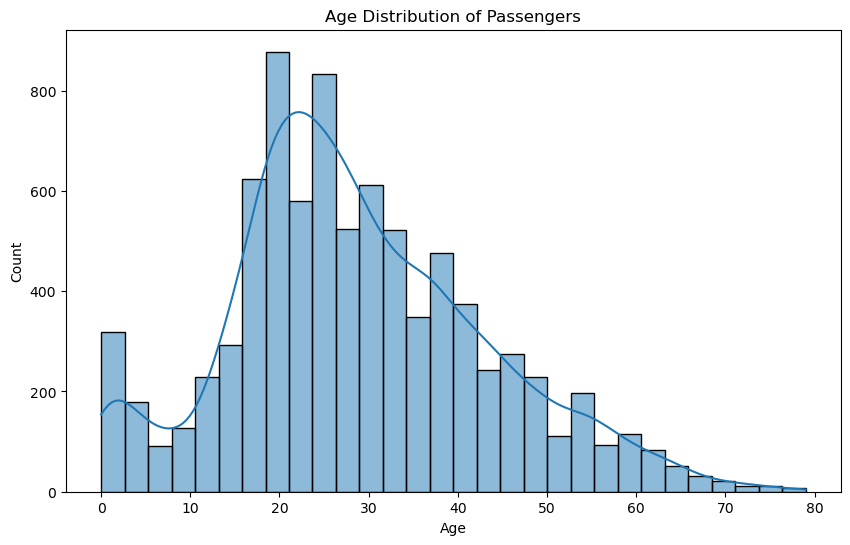

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution of Passengers')
plt.show()

## 5.2. CryoSleep vs Transported

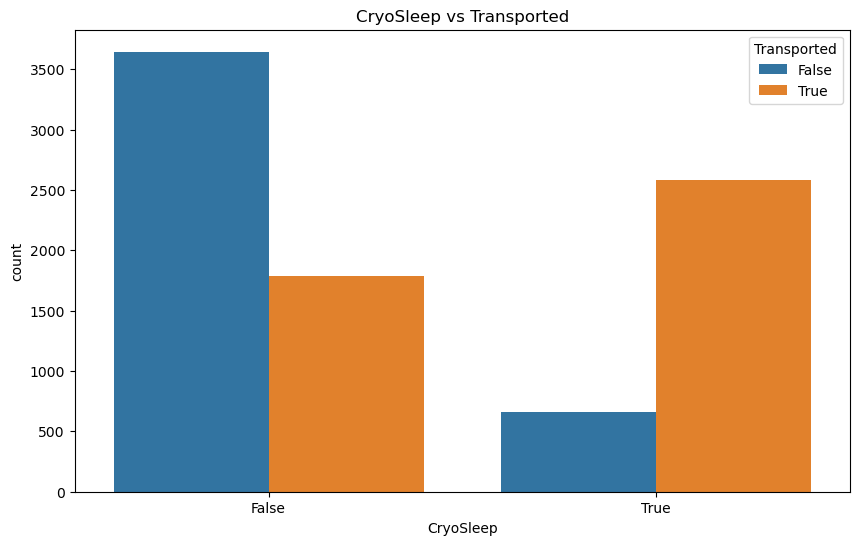

In [127]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CryoSleep', hue='Transported', data=df)
plt.title('CryoSleep vs Transported')
plt.show()

## 5.3. HomePlanet Distribution

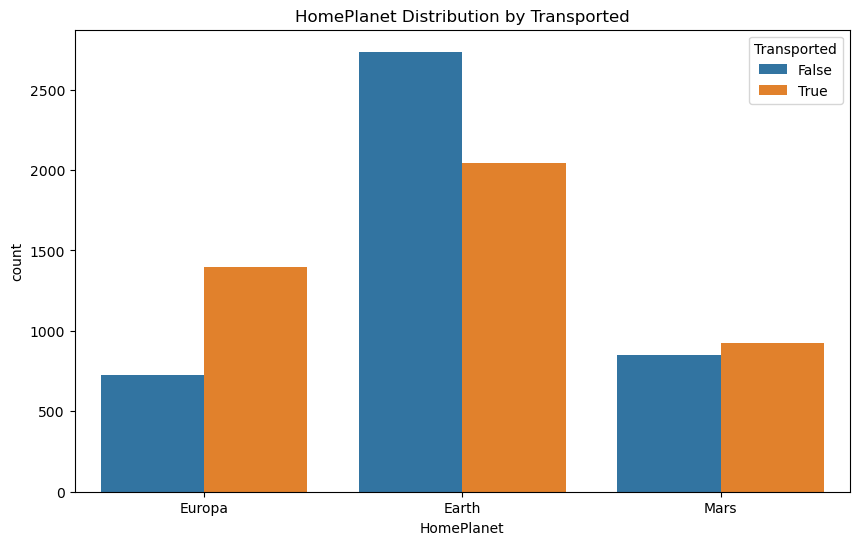

In [129]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HomePlanet', hue='Transported', data=df)
plt.title('HomePlanet Distribution by Transported')
plt.show()

## 5.4. Spending columns vs Transported

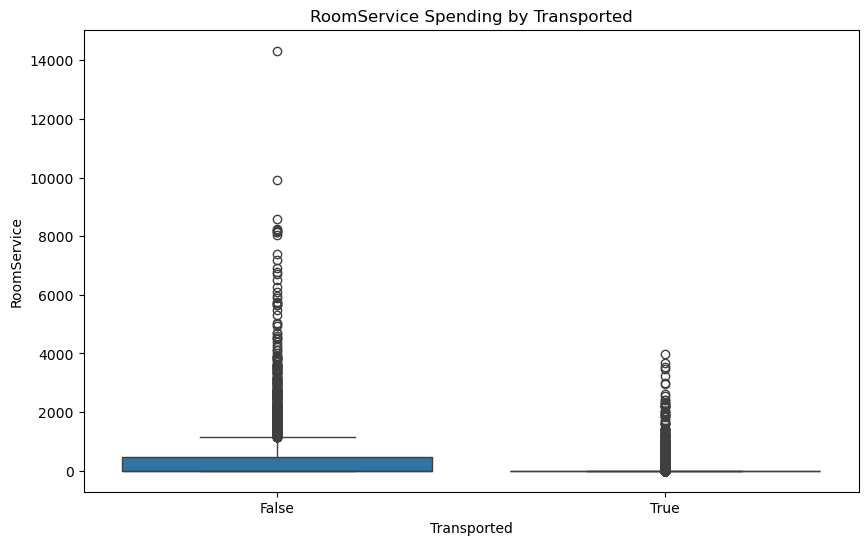

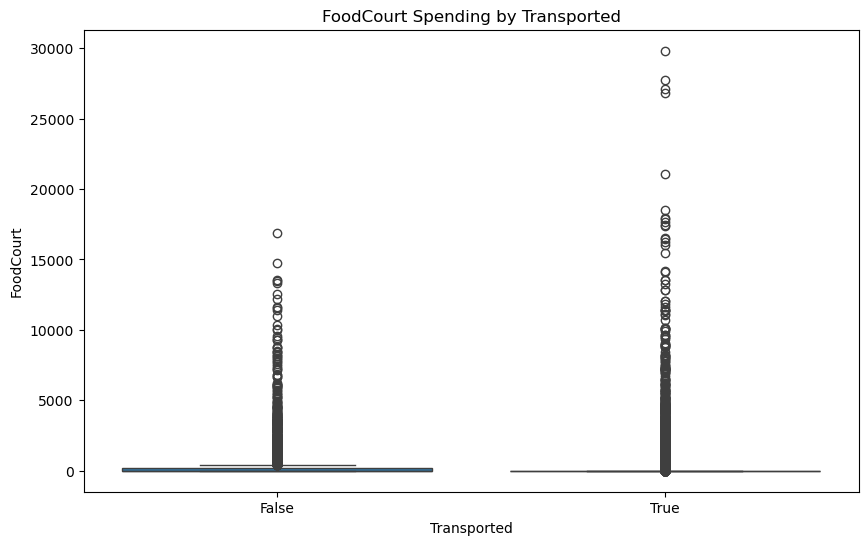

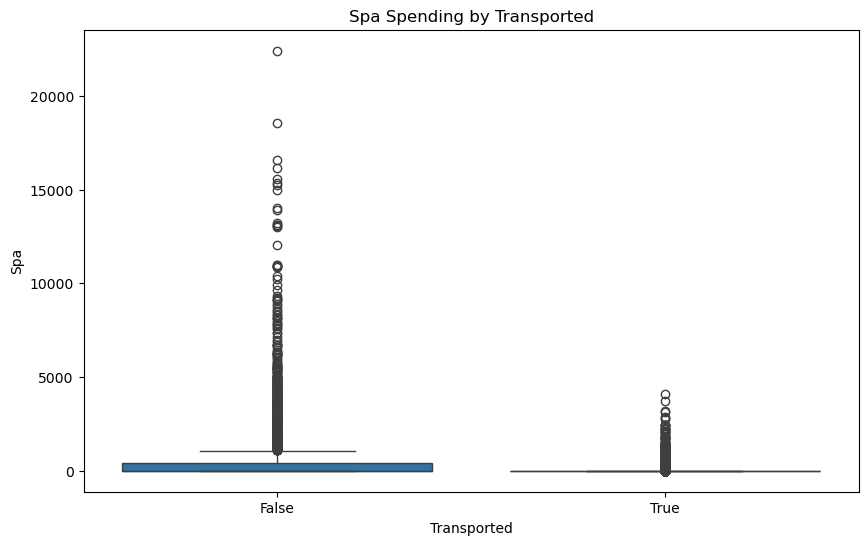

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='RoomService', data=df)
plt.title('RoomService Spending by Transported')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='FoodCourt', data=df)
plt.title('FoodCourt Spending by Transported')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='Spa', data=df)
plt.title('Spa Spending by Transported')
plt.show()

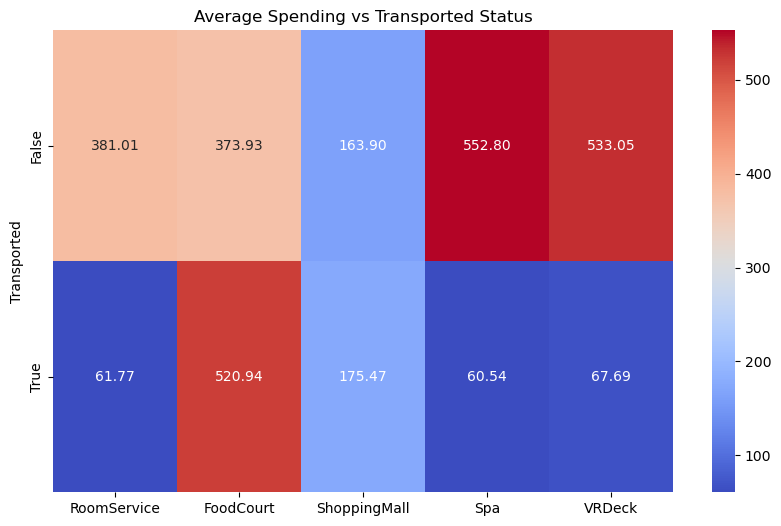

In [149]:
# Assuming the DataFrame is named df and the spending columns are defined
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Calculate the mean spending by Transported status
spending_by_transported = df.groupby('Transported')[spending_cols].mean()

# Reset index to use Transported as a column for the heatmap
spending_by_transported = spending_by_transported.reset_index()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(spending_by_transported.set_index('Transported'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Spending vs Transported Status')
plt.show()


# Conclusion(insights)
## 1.Most passengers are between 20 and 30 years old on the Spaceship
## 2.Individuals in CryoSleep are more likely to be transported.
## 3.Europa: Has the highest number of transported individuals.Earth: Has the highest number of non-transported individuals.Mars: Has a relatively balanced distribution.
## 4.Higher Spending individual are more likely to be Transported
